In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv("./../../datasets/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
#cojo unas columnas solo
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')#como ints
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
print(churn_df.shape)
print(churn_df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [6]:
#X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
#X[0:5]
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
print(X)

     tenure   age  address  income   ed  employ  equip
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0
..      ...   ...      ...     ...  ...     ...    ...
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0

[200 rows x 7 columns]


In [7]:
#y = np.asarray(churn_df['churn'])
#y [0:5]
y=churn_df['churn']
print(y)

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: churn, Length: 200, dtype: int32


In [8]:
from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
scaler = preprocessing.StandardScaler()
# transform data
X = scaler.fit_transform(X)
print(X)


[[-1.13518441 -0.62595491 -0.4588971  ...  1.6961288  -0.58477841
  -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 ... -0.6433592  -1.14437497
  -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   ... -1.42318853 -0.92053635
  -0.85972695]
 ...
 [-1.36680743 -0.7026181  -0.16283445 ... -1.42318853 -0.02518185
  -0.85972695]
 [-0.53296457 -0.85594447 -1.14970993 ...  0.91629947 -0.58477841
  -0.85972695]
 [ 1.18104577  0.67731925  0.42929083 ... -0.6433592   1.31784991
   1.16316   ]]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)


LogisticRegression(C=0.01, solver='liblinear')

In [11]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

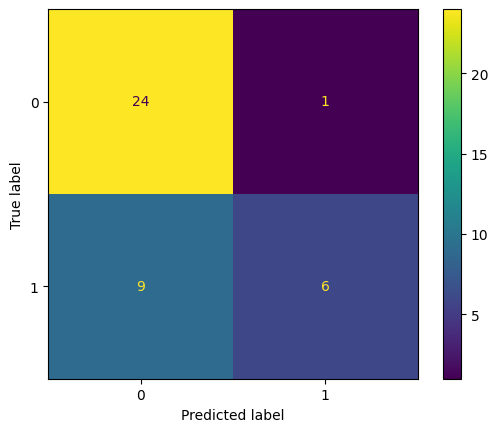

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix=confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [14]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40

